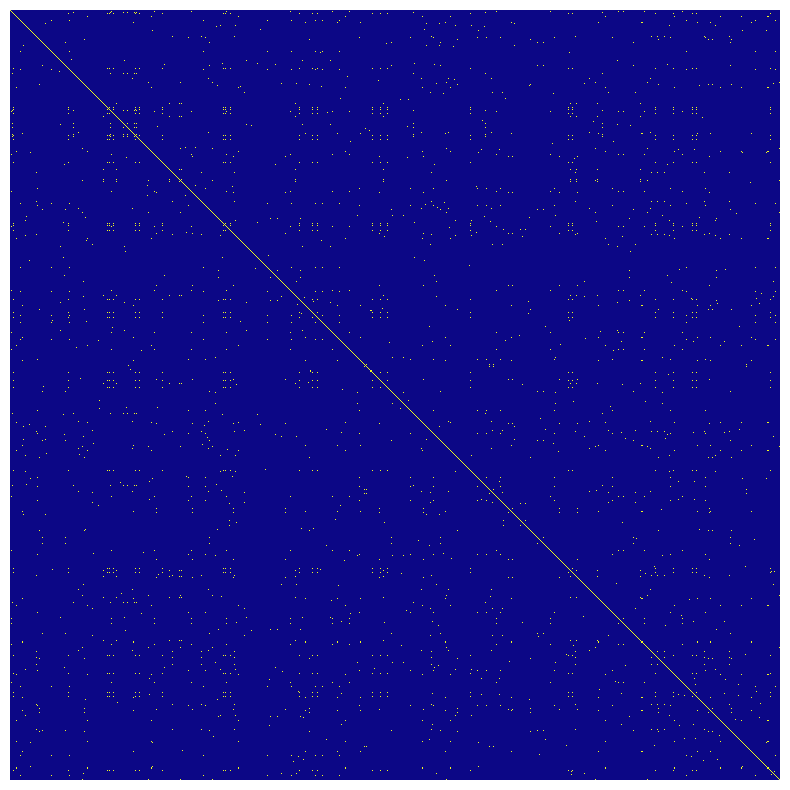

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import re
import random

# Sample text from the play
with open('midsummer.txt', 'r') as file:
    file_content = file.read()

# Preprocess the text: remove pagination, URLs, constant text, character names, and anything within brackets
cleaned_text = re.sub(r'\d+ / \d+', '', text)  # Remove pagination
cleaned_text = re.sub(r'https?://\S+', '', cleaned_text)  # Remove URLs
cleaned_text = re.sub(r'Full Text Archive', '', cleaned_text, flags=re.IGNORECASE)  # Remove constant text
cleaned_text = re.sub(r'\[.*?\]', '', cleaned_text)  # Remove stage directions
cleaned_text = re.sub(r'^[A-Z]+\n', '', cleaned_text, flags=re.MULTILINE)  # Remove character names

# Function to create a self-similarity matrix for the given text
def create_self_similarity_matrix(text):
    words = text.lower().replace('.', '').replace(',', '').replace(')', '').replace("'", '').replace('"', '').split()
    n = len(words)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if words[i] == words[j]:
                matrix[i, j] = 1
    return matrix

# Adjust the '1' values in the matrix
def adjust_matrix_values(matrix):
    adjusted_matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 1:
                # Assign a random value from the second half of the colormap range
                adjusted_matrix[i, j] = 0.2 + random.random() * 0.8
    return adjusted_matrix

# Create and adjust the self-similarity matrix for the text
matrix = create_self_similarity_matrix(file_content)
adjusted_matrix = adjust_matrix_values(matrix)

# Plot the matrix
plt.figure(figsize=(10, 10))
plt.imshow(similarity_matrix, cmap='plasma', interpolation='none')
plt.axis('off')
plt.show()